In [1]:
# Modelling objective:To identify factors leading to attrition/resignation of employees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
# to display variables in the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# to check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [9]:
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [10]:
# to print out categorical variable
df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


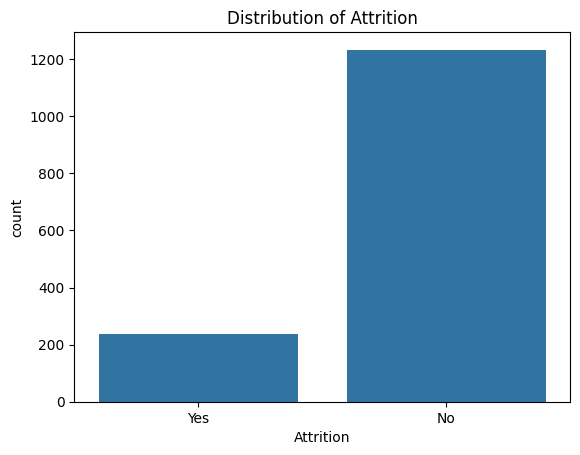

In [11]:
# to see distribution of target variable 'Attrition'
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.show()

In [12]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [13]:
# Class imbalanced: 16.12% resigned from the company
pd.DataFrame(100* df['Attrition'].value_counts()/len(df))

,count
Attrition,
No,83.877551
Yes,16.122449


In [14]:
# to check Age range of employees in the company
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

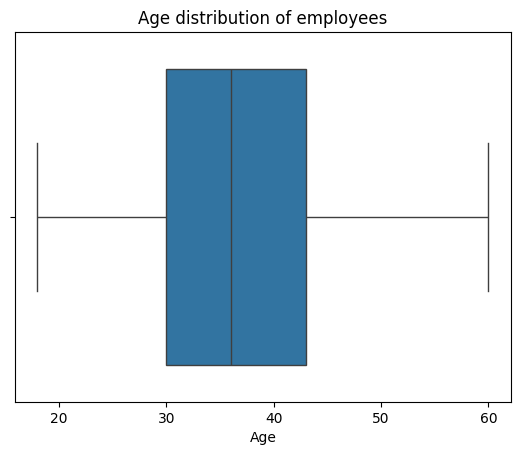

In [15]:
# Average age of employees = 37 years old
sns.boxplot(data=df, x='Age')
plt.title('Age distribution of employees')
plt.show()

In [16]:
# to define a custom function of age categories
# min. = 18 years
# max. = 60 years
def age_categories(s):
    if 18 <= s <= 30:
        return "18 to 30"
    elif 31 <= s <= 42:
        return "31 to 42"
    elif 43 <= s <= 55:
        return "43 to 55"
    elif s >= 56:
        return "above 56"

In [17]:
# to create new variable by applying custom function, .apply()
df['age_categories'] = df['Age'].apply(age_categories)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_categories
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,31 to 42
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,43 to 55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,31 to 42
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,31 to 42
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,18 to 30


In [19]:
df['age_categories'].value_counts()

age_categories
31 to 42    705
18 to 30    386
43 to 55    332
above 56     47
Name: count, dtype: int64

In [20]:
age_categories_order =['18 to 30',
                       '31 to 42',
                       '43 to 55',
                      'above 56']

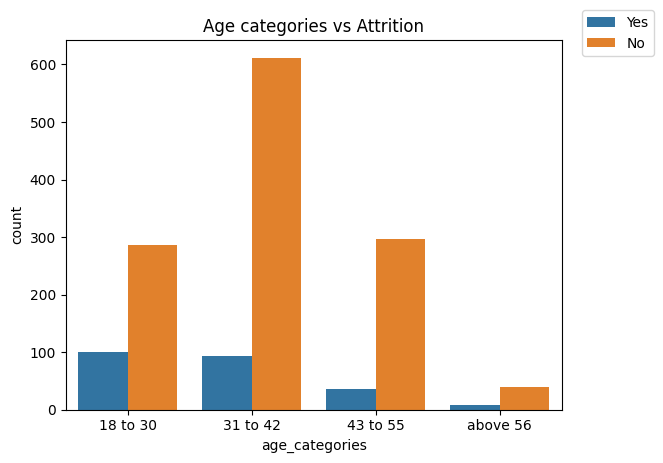

In [21]:
# exploratory data analysis 
# Employee who resigned are mostly in the age range : 18 to 30 years, 31 to 42 years
sns.countplot(data=df, x='age_categories', hue='Attrition', order=age_categories_order)
plt.title('Age categories vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

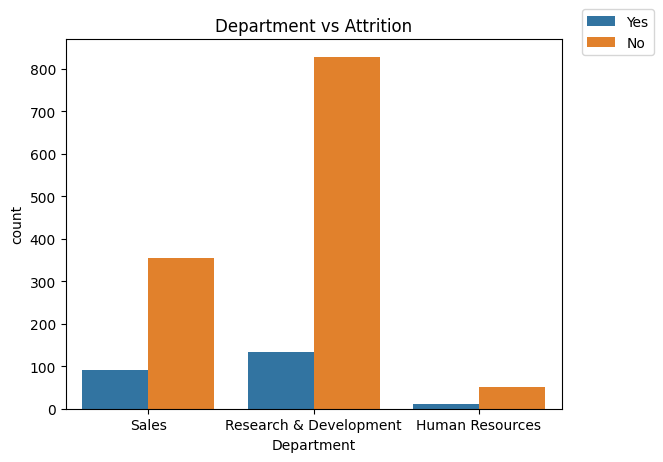

In [22]:
# most employee resignations came from Research & Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

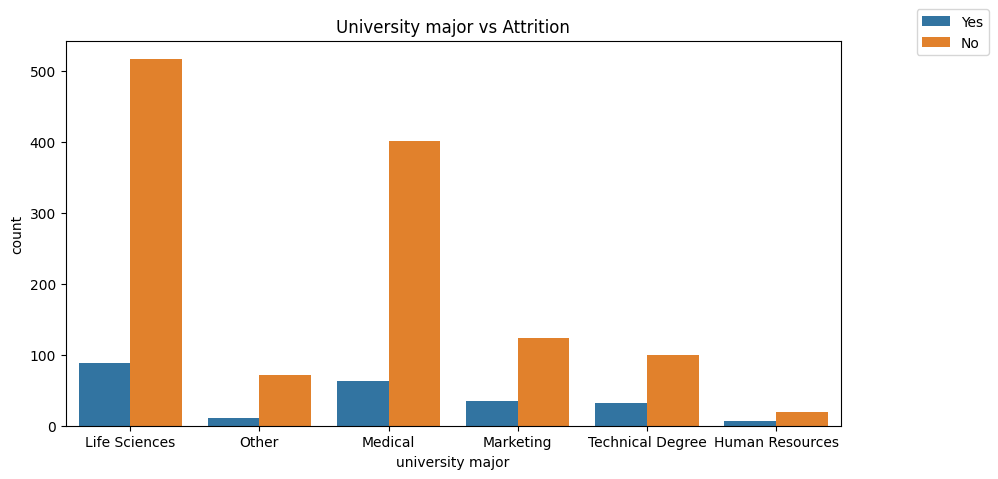

In [23]:
# Most resignations came from employees who majored in Life Sciences & Medical
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('University major vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.xlabel('university major')
plt.show()

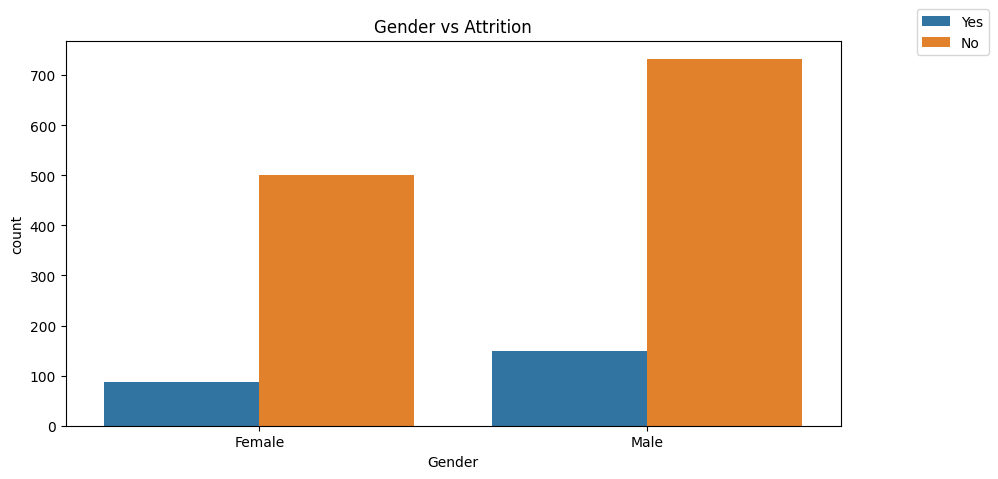

In [24]:
# majority of employees who resigned were males
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Gender vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

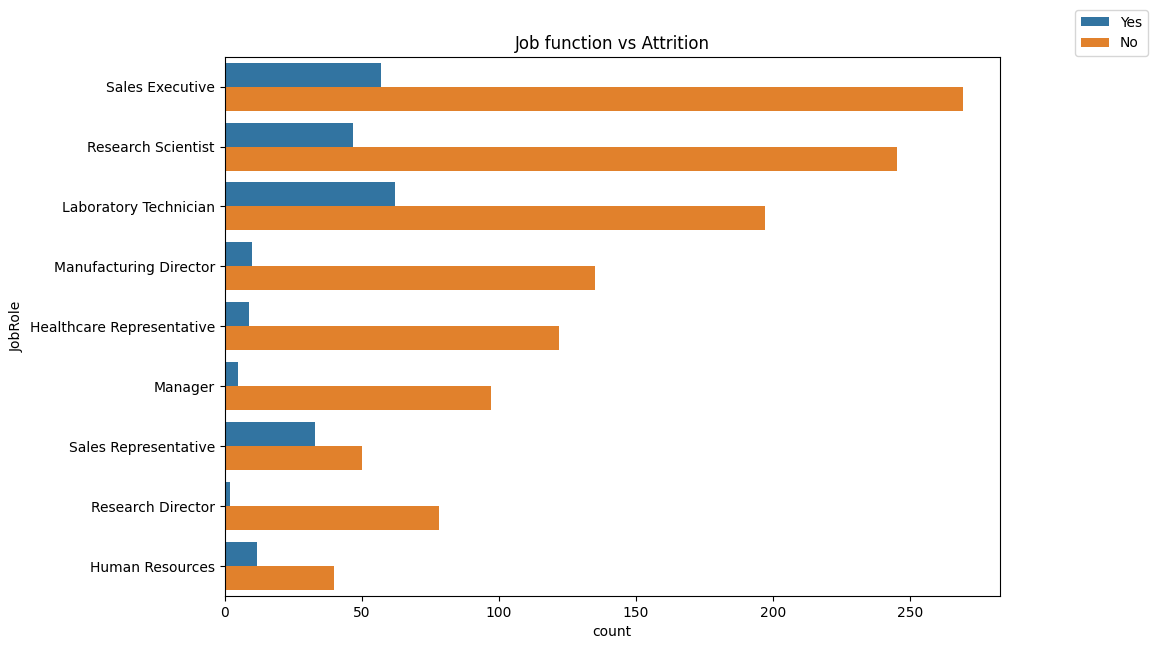

In [25]:
# Lab Technician & Sales Executive have the highest resignation rate
plt.figure(figsize=(10,7), dpi=100)
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Job function vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

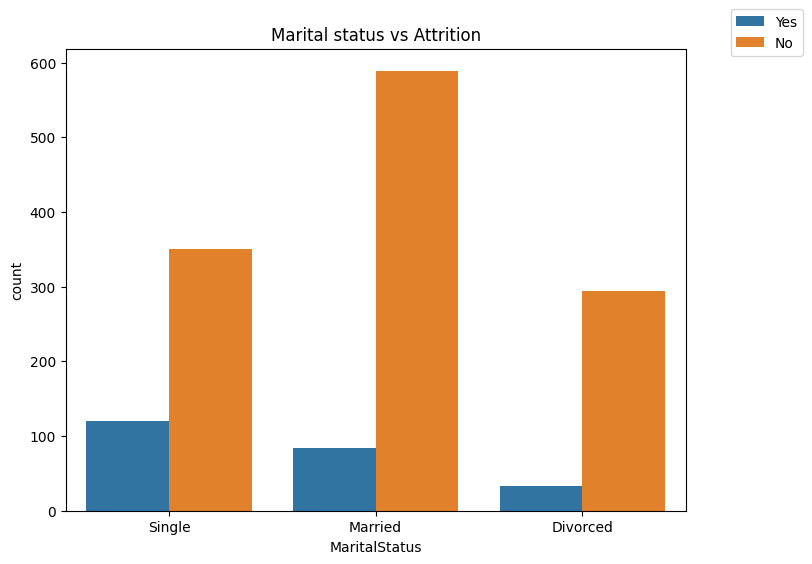

In [26]:
# majority of those who resigned are 'Single'
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Marital status vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [27]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

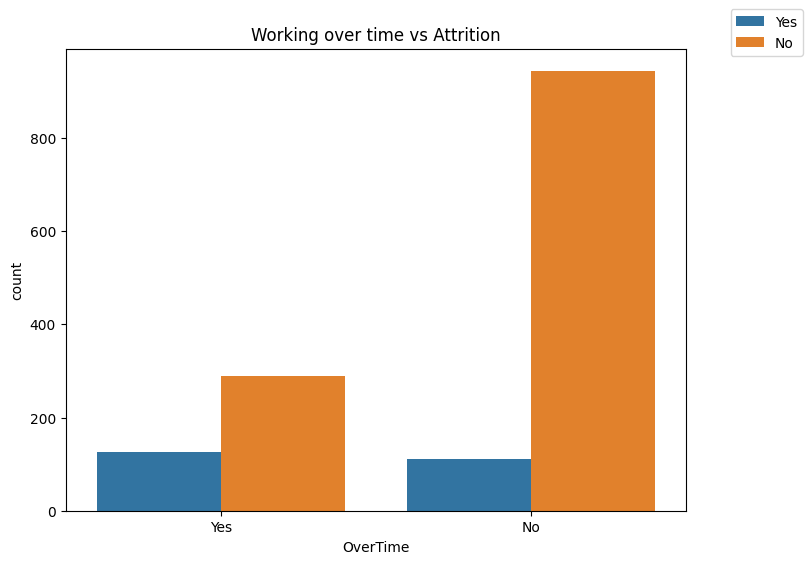

In [28]:
# those who resigned are those who mostly working over time
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Working over time vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

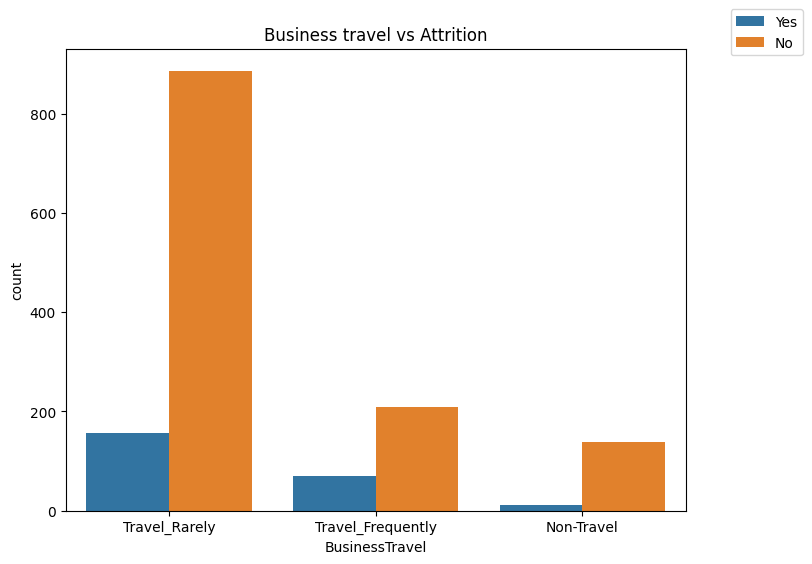

In [29]:
# Employees who resigned hardly go for business travel
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Business travel vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [30]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
# to convert 'Attrition' to numeric by mapping to perform further analysis
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [32]:
# to double-check change
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [33]:
df.select_dtypes(['int','float'])

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [34]:
# to see correlation of all numeric variables against 'Attrition'
# order by descending
# 'DistanceFromHome' and 'NumCompaniesWorked' shows the highest correlation to Attrition among all numeric variables
df.select_dtypes(['int', 'float']).corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

In [35]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [36]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [37]:
# to remove 'EmployeeCount' and 'StandardHours', not useful variable for analysis
df = df.drop(['EmployeeCount','StandardHours'], axis=1)

In [38]:
# to read into a new df to plot a correlation heatmap
num_corr = df.select_dtypes(['int', 'float']).corr()

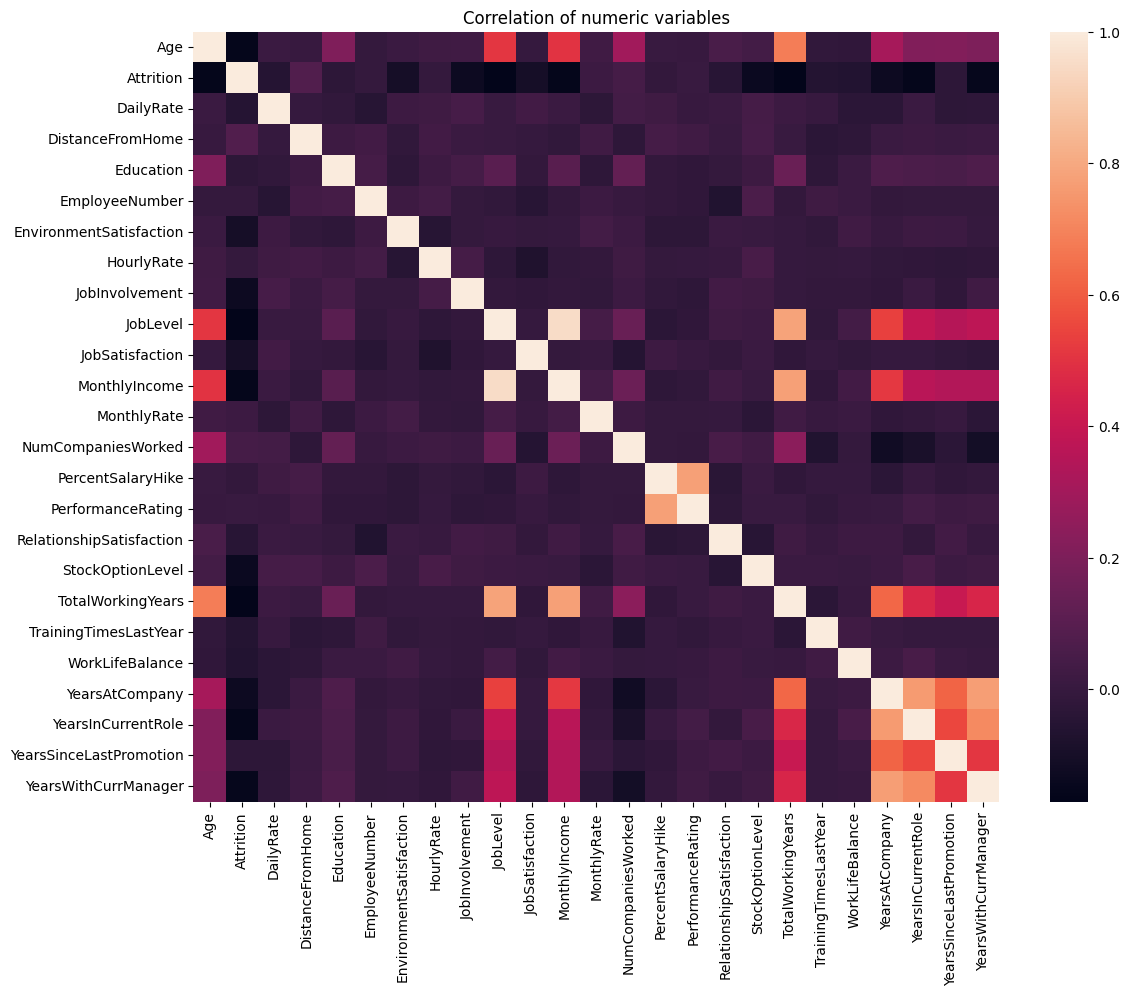

In [39]:
plt.figure(figsize=(13,10), dpi=100)
sns.heatmap(data=num_corr)
plt.title('Correlation of numeric variables')
plt.show()

In [40]:
# to remove unimportant variables before predictive modelling
df = df.drop(['age_categories','Over18','EmployeeNumber'], axis=1)

In [41]:
# to define X and y
X = df.drop('Attrition', axis=1)

In [42]:
# to convert categorical variable into dummy variables before modelling, drop_first=True to prevent multi-collinearity
X = pd.get_dummies(X, drop_first=True)

In [43]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,2,87,4,2,2,6142,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,False,False,False,True,False,True,False,False


In [44]:
y = df['Attrition']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# to scale variables to the same scale
from sklearn.preprocessing import StandardScaler

In [47]:
# testing set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
# to scale, fit transform on the X train data to prevent data leakage to the y test set
scaled_X_train = scaler.fit_transform(X_train)

In [50]:
# to transform on the X testing set
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [52]:
from xgboost import XGBClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.svm import SVC

In [56]:
# to import KNN machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
dt = DecisionTreeClassifier()

In [60]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [61]:
# Set up GridSearchCV
dt_clf = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [62]:
# Fit GridSearchCV
dt_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [63]:
# Best parameters and score
print("Best parameters found: ", dt_clf.best_params_)
print("Best score found: ", dt_clf.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score found:  0.8120879913451136


In [64]:
# AUC score for Decision Treet test prediction model = 0.55
best_model = dt_clf.best_estimator_
dt_test_pred = best_model.predict(scaled_X_test)
print("DT test AUC score: ", roc_auc_score(y_test, dt_test_pred))

DT test AUC score:  0.5457831325301205


In [65]:
best_model = dt_clf.best_estimator_
dt_train_pred = best_model.predict(scaled_X_train)
print("DT train AUC score: ", roc_auc_score(y_train, dt_train_pred))

DT train AUC score:  0.8974847560975611


In [66]:
print(classification_report(y_test,dt_test_pred)) # decision tree classifier

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       249
           1       0.25      0.20      0.22        45

    accuracy                           0.79       294
   macro avg       0.56      0.55      0.55       294
weighted avg       0.77      0.79      0.78       294



In [67]:
rf = RandomForestClassifier()

In [68]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [69]:
# Set up GridSearchCV
rf_clf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [70]:
# to convert y_train from 'int' to float64 datatype
y_train = y_train.astype(np.float64)

In [71]:
scaled_X_train.dtype

dtype('float64')

In [72]:
# Fit GridSearchCV
rf_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [73]:
# Best parameters and score
print("Best parameters found: ", rf_clf.best_params_)
print("Best score found: ", rf_clf.best_score_)

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score found:  0.8605553552109628


In [74]:
# AUC score for Random Forest test prediction model = 0.574
best_model = rf_clf.best_estimator_
rf_test_pred = best_model.predict(scaled_X_test)
print("RF test AUC score: ", roc_auc_score(y_test, rf_test_pred ))

RF test AUC score:  0.5626506024096386


In [75]:
best_model = rf_clf.best_estimator_
rf_train_pred = best_model.predict(scaled_X_train)
print("RF train AUC score: ", roc_auc_score(y_train, rf_train_pred))

RF train AUC score:  1.0


In [76]:
print(classification_report(y_test, rf_test_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       249
           1       0.75      0.13      0.23        45

    accuracy                           0.86       294
   macro avg       0.81      0.56      0.57       294
weighted avg       0.85      0.86      0.82       294



In [77]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier()

In [78]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME']
}

In [79]:
# Initialize GridSearchCV with 5-fold cross-validation
ada_clf = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [80]:
# Fit the model on the training data
ada_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [81]:
# Print the best parameters and best score
print("Best Parameters:", ada_clf.best_params_)
print("Best Cross-Validation Accuracy:", ada_clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8724594302199783


In [82]:
# AUC score for AdaBoost test model = 0.673
best_model = ada_clf.best_estimator_
ada_test_pred = best_model.predict(scaled_X_test)
print("AdaBoost test AUC score: ", roc_auc_score(y_test, ada_test_pred))

AdaBoost test AUC score:  0.6728246318607765


In [83]:
best_model = ada_clf.best_estimator_
ada_train_pred = best_model.predict(scaled_X_train)
print("AdaBoost train AUC score: ", roc_auc_score(y_train, ada_train_pred))

AdaBoost train AUC score:  0.7283409552845528


In [84]:
print(classification_report(y_test, ada_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       249
           1       0.68      0.38      0.49        45

    accuracy                           0.88       294
   macro avg       0.79      0.67      0.71       294
weighted avg       0.86      0.88      0.86       294



In [85]:
# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

In [86]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [87]:
# Initialize GridSearchCV with 5-fold cross-validation
gbc_clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [88]:
# Fit the model on the training data
gbc_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [89]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", gbc_clf.best_params_)
print("Best Cross-Validation Accuracy:", gbc_clf.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8750126217093401


In [90]:
# AUC score for Gradient Boost classifier test set = 0.655
best_model = gbc_clf.best_estimator_
gbc_test_pred = best_model.predict(scaled_X_test)
print("Gradient Boost classifier:", roc_auc_score(y_test, gbc_test_pred))

Gradient Boost classifier: 0.6597054886211513


In [91]:
best_model = gbc_clf.best_estimator_
gbc_train_pred = best_model.predict(scaled_X_train)
print("Gradient Boost classifier:", roc_auc_score(y_train, gbc_train_pred))

Gradient Boost classifier: 0.9921875


In [92]:
print(classification_report(y_test, gbc_test_pred)) # Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       249
           1       0.64      0.36      0.46        45

    accuracy                           0.87       294
   macro avg       0.77      0.66      0.69       294
weighted avg       0.85      0.87      0.85       294



In [93]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

In [94]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [95]:
# Initialize GridSearchCV with 5-fold cross-validation
xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [96]:
# Fit the model on the training data
xgb_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [97]:
# Print the best parameters and best score
print("Best Parameters:", xgb_clf.best_params_)
print("Best Cross-Validation Accuracy:", xgb_clf.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
Best Cross-Validation Accuracy: 0.8792643346556076


In [98]:
# AUC score for XGBoost classifier test score = 0.666
best_model = xgb_clf.best_estimator_
xgb_test_pred = best_model.predict(scaled_X_test)
print("XGBoost classifier AUC test score: ", roc_auc_score(y_test, xgb_test_pred))

XGBoost classifier AUC test score:  0.6657295850066935


In [99]:
best_model = xgb_clf.best_estimator_
xgb_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, xgb_train_pred))

XGBoost classifier AUC train score:  0.853150406504065


In [100]:
print(classification_report(y_test, xgb_test_pred))  # XGBoost classifier

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       249
           1       0.73      0.36      0.48        45

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [101]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [102]:
#help(LogisticRegression)

In [103]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (to prevent over-fitting)
    'max_iter': [100,150]  # Maximum number of iterations
}

In [104]:
lr_clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [105]:
# Fit the grid search to the data
lr_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 150]},
             verbose=2)

In [106]:
# Print the best parameters and best score
print("Best Parameters:", lr_clf.best_params_)
print("Best Cross-Validation Accuracy:", lr_clf.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.8886116119725929


In [107]:
# AUC score for Logistic Regression test score = 0.69
best_model = lr_clf.best_estimator_
lr_test_pred = best_model.predict(scaled_X_test)
print("XGBoost classifier AUC test score: ", roc_auc_score(y_test, lr_test_pred))

XGBoost classifier AUC test score:  0.6950468540829987


In [108]:
best_model = lr_clf.best_estimator_
lr_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, lr_train_pred))

XGBoost classifier AUC train score:  0.7194486788617885


In [109]:
print(classification_report(y_test, lr_test_pred))  # Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       249
           1       0.70      0.42      0.53        45

    accuracy                           0.88       294
   macro avg       0.80      0.70      0.73       294
weighted avg       0.87      0.88      0.87       294



In [110]:
# Initialize the Support Vector Classifier
svc = SVC()

In [111]:
# Define the parameter grid, Support Vector
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']    # Kernel type
}

In [112]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
svc_clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [113]:
# Fit the grid search to the data
svc_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [114]:
# Print the best parameters and best score
print("Best Parameters:", svc_clf.best_params_)
print("Best Cross-Validation Accuracy:", svc_clf.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.8852145690587812


In [115]:
# AUC score for Support Vector classifier test score = 0.66
best_model = svc_clf.best_estimator_
svc_test_pred = best_model.predict(scaled_X_test)
print("Support Vector classifier AUC test score: ", roc_auc_score(y_test, svc_test_pred))

Support Vector classifier AUC test score:  0.6617135207496654


In [116]:
# AUC score for Support Vector classifier train score = 0.72
best_model = svc_clf.best_estimator_
svc_train_pred = best_model.predict(scaled_X_train)
print("Support Vector classifier AUC test score: ", roc_auc_score(y_train, svc_train_pred))

Support Vector classifier AUC test score:  0.7178607723577236


In [117]:
print(classification_report(y_test, svc_test_pred))  # Support Vector Classifier

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       249
           1       0.67      0.36      0.46        45

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.86      0.87      0.86       294



In [118]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [119]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [120]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [121]:
# Fit the grid search to the data
knn_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [122]:
# Print the best parameters and best score
print("Best Parameters:", knn_clf.best_params_)
print("Best Cross-Validation Accuracy:", knn_clf.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8554417598269023


In [123]:
# AUC score for K Nearest neighbor test score = 0.55
best_model = knn_clf.best_estimator_
knn_test_pred = best_model.predict(scaled_X_test)
print("KNN classifier AUC test score: ", roc_auc_score(y_test, knn_test_pred))

KNN classifier AUC test score:  0.5495314591700134


In [124]:
best_model = knn_clf.best_estimator_
knn_train_pred = best_model.predict(scaled_X_train)
print("KNN classifier AUC train score: ", roc_auc_score(y_train, knn_train_pred))

KNN classifier AUC train score:  0.5766006097560976


In [125]:
print(classification_report(y_test, knn_test_pred))  # KNN

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       249
           1       0.62      0.11      0.19        45

    accuracy                           0.85       294
   macro avg       0.74      0.55      0.55       294
weighted avg       0.82      0.85      0.81       294



In [126]:
# AdaBoost classifier AUC test score = 0.673

In [128]:
# ada_clf.feature_importances

In [130]:
best_model = ada_clf.best_estimator_

In [132]:
ada_feature_importances = best_model.feature_importances_

In [134]:
# feature importance of AdaBoost classifier
ada_feature_importances

array([0.09409154, 0.03217569, 0.03953209, 0.        , 0.02659612,
       0.00897519, 0.06010552, 0.03643817, 0.01433542, 0.12208566,
       0.00560213, 0.03217737, 0.00329756, 0.        , 0.02230343,
       0.02647481, 0.07487127, 0.00454943, 0.00624507, 0.04490198,
       0.01865272, 0.02813282, 0.06122291, 0.02216994, 0.        ,
       0.        , 0.01194231, 0.00886334, 0.00623924, 0.        ,
       0.        , 0.        , 0.01071036, 0.        , 0.00573702,
       0.        , 0.        , 0.03260531, 0.01260366, 0.        ,
       0.        , 0.        , 0.00657257, 0.11978935])

In [136]:
pd.DataFrame(data= ada_feature_importances, index= X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

,Importance
MonthlyIncome,0.122086
OverTime_Yes,0.119789
Age,0.094092
TotalWorkingYears,0.074871
YearsWithCurrManager,0.061223
JobInvolvement,0.060106
YearsAtCompany,0.044902
DistanceFromHome,0.039532
JobLevel,0.036438
JobRole_Research Director,0.032605


In [138]:
# to read into a new dataframe 
ada_imp = pd.DataFrame(data= ada_feature_importances, index= X.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

In [140]:
# to filter away 'importance' less than 0
ada_imp = ada_imp[ada_imp['Importance'] > 0]

In [142]:
ada_imp

,Importance
MonthlyIncome,0.122086
OverTime_Yes,0.119789
Age,0.094092
TotalWorkingYears,0.074871
YearsWithCurrManager,0.061223
JobInvolvement,0.060106
YearsAtCompany,0.044902
DistanceFromHome,0.039532
JobLevel,0.036438
JobRole_Research Director,0.032605


C:\Users\miche\AppData\Local\Temp\ipykernel_4656\2156110772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='coolwarm')


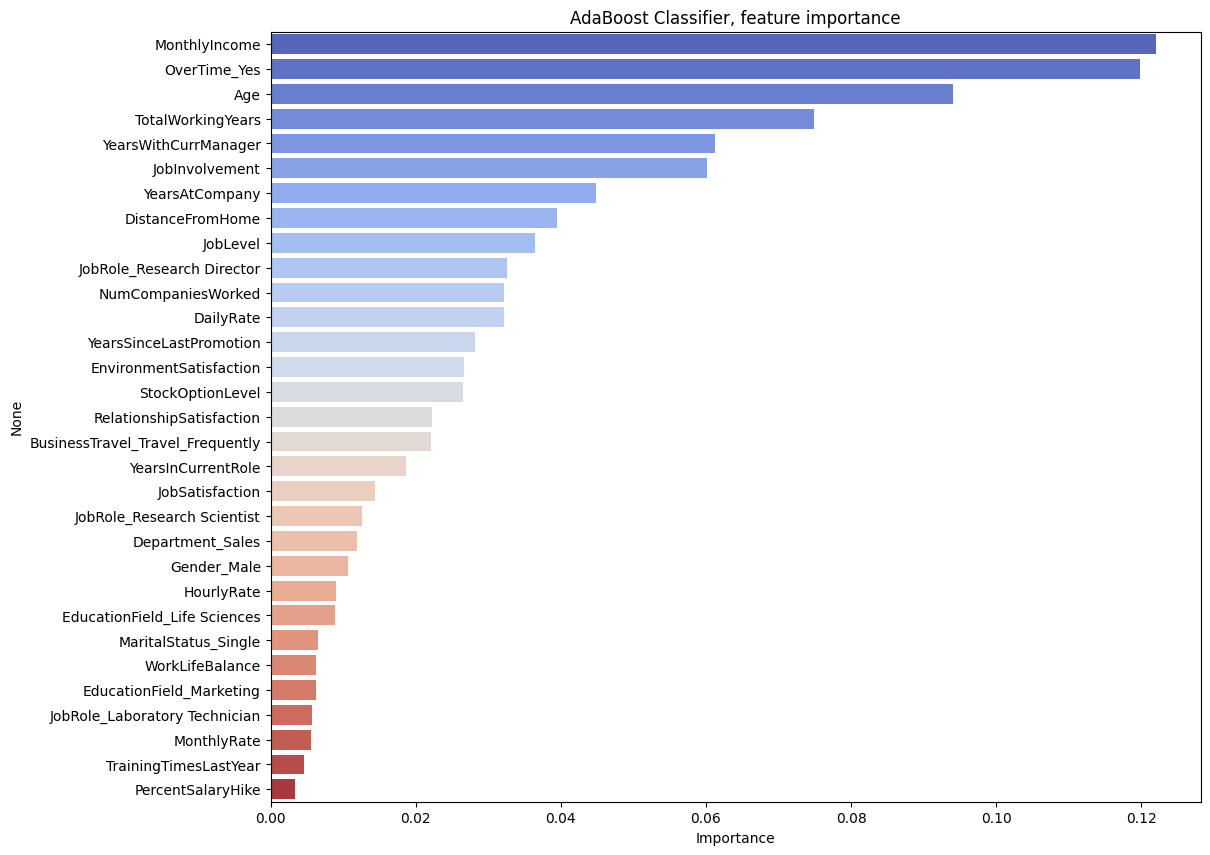

In [144]:
# Predictors of employee's regisnation = 1) Monthly income, 2)Over_time_yes, 3) Age, 4) Total working years
# to visualise feature importance in a bar plot
plt.figure(figsize=(12,10),dpi=100)
sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='coolwarm')
plt.title("AdaBoost Classifier, feature importance", fontsize=12)
plt.show()

In [ ]:
# Job involvement 
#  1 = 'Low'
#  2 = 'Medium'
#  3 = 'High'
#  4 = 'Very High'